In [2]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
import qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram
from numpy import random

from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

C:\Users\barbi\AppData\Local\Temp\ipykernel_5504\4040705355.py:14: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


# For Correlated Ancillae

In [18]:
def corr(q, c, system, ancillae, g, t, i):
    coA = QuantumCircuit(q,c)
    
    # State Preparation
    coA.h(q[system])
    coA.h(q[ancillae[2]])
    coA.cnot(q[ancillae[2]],q[ancillae[1]])
    coA.cnot(q[ancillae[2]],q[ancillae[0]])
    
    # Collisions between the system and ancilla qubits
    for j in range(1, i+1, 1):
        if j%2 != 0:
            coA.cnot(q[ancillae[0]],q[system])
            coA.rz(t, q[system])
            coA.cnot(q[ancillae[0]],q[system])
        else:
            coA.cnot(q[ancillae[1]],q[system])
            coA.rz(t, q[system])
            coA.cnot(q[ancillae[1]],q[system])
    
    coA.h(q[system])
    
    return coA

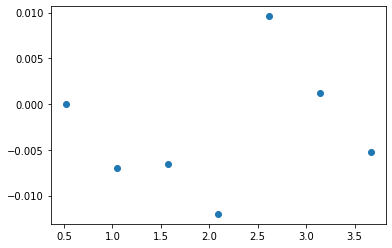

In [20]:
q = QuantumRegister(4,name = 'q')
c = ClassicalRegister(4, name = 'c')
system = 0
ancillae = [1, 2, 3]
rho_12, T = [], []
n = 7
tt = np.pi/6
g = 1
t = g*(tt)
for i in range(1,8,1):
    circ = corr(q, c, system, ancillae,g, tt, i)
    T.append(i*t)
    qst_bell = state_tomography_circuits(circ, q[system])
    job = qiskit.execute(qst_bell, Aer.get_backend('qasm_simulator'), shots=5000)
    tomo_fitter_bell = StateTomographyFitter(job.result(), qst_bell)
    rho = tomo_fitter_bell.fit(method='lstsq')
    rho_12.append(rho[0,1])
    
plt.scatter(T, np.real(rho_12))